In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
learn = pd.read_csv('C:\\Users\\GNANASEKARAN\\OneDrive\\Documents\\Python Project\\ExtraaLearn.csv')    ##  complete the code to read the data

In [4]:
data = learn.copy()

In [5]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [6]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [7]:
data.shape

(4612, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [9]:
data.duplicated().sum()

0

In [10]:
data["ID"].nunique()

4612

In [11]:
data = data.drop(['ID'], axis=1)

In [12]:
data.head()


,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [15]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

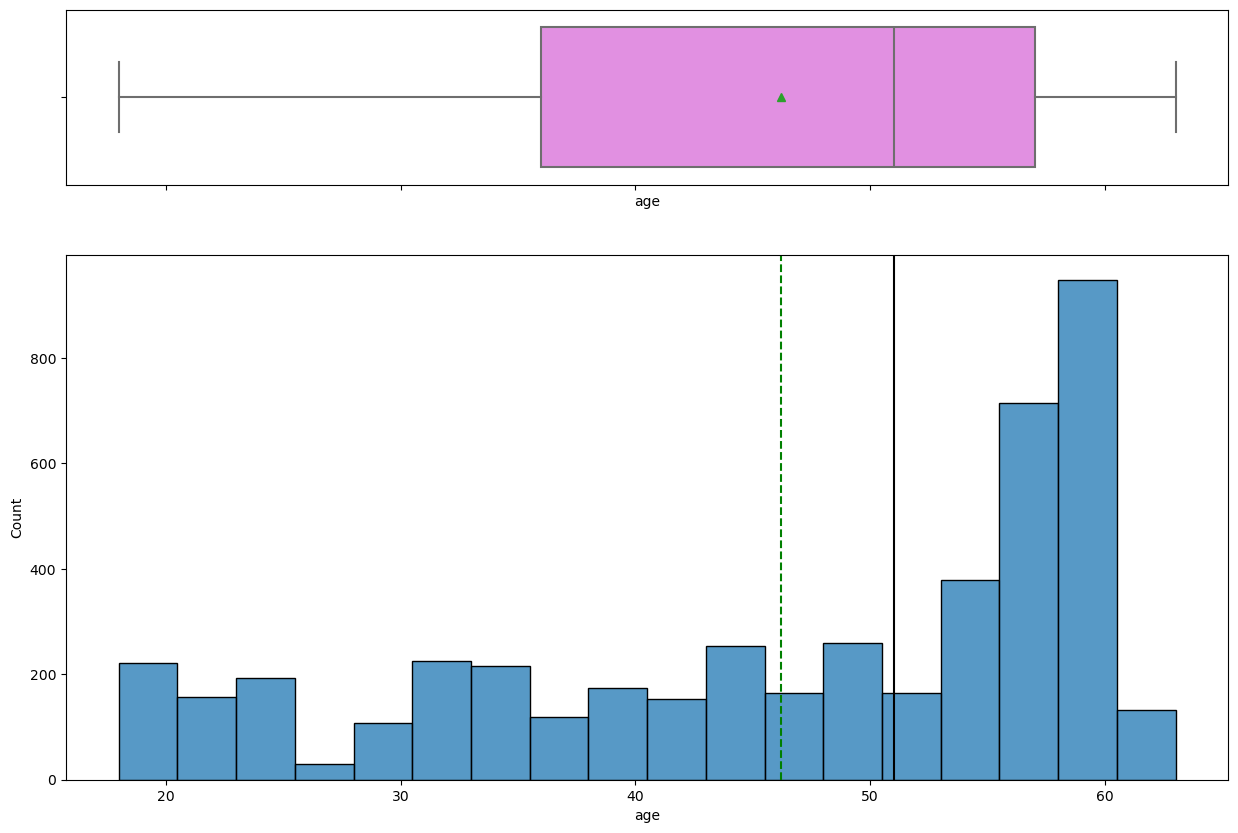

In [20]:
#UNIVARIATE ANALYSIS

histogram_boxplot(data, "age")

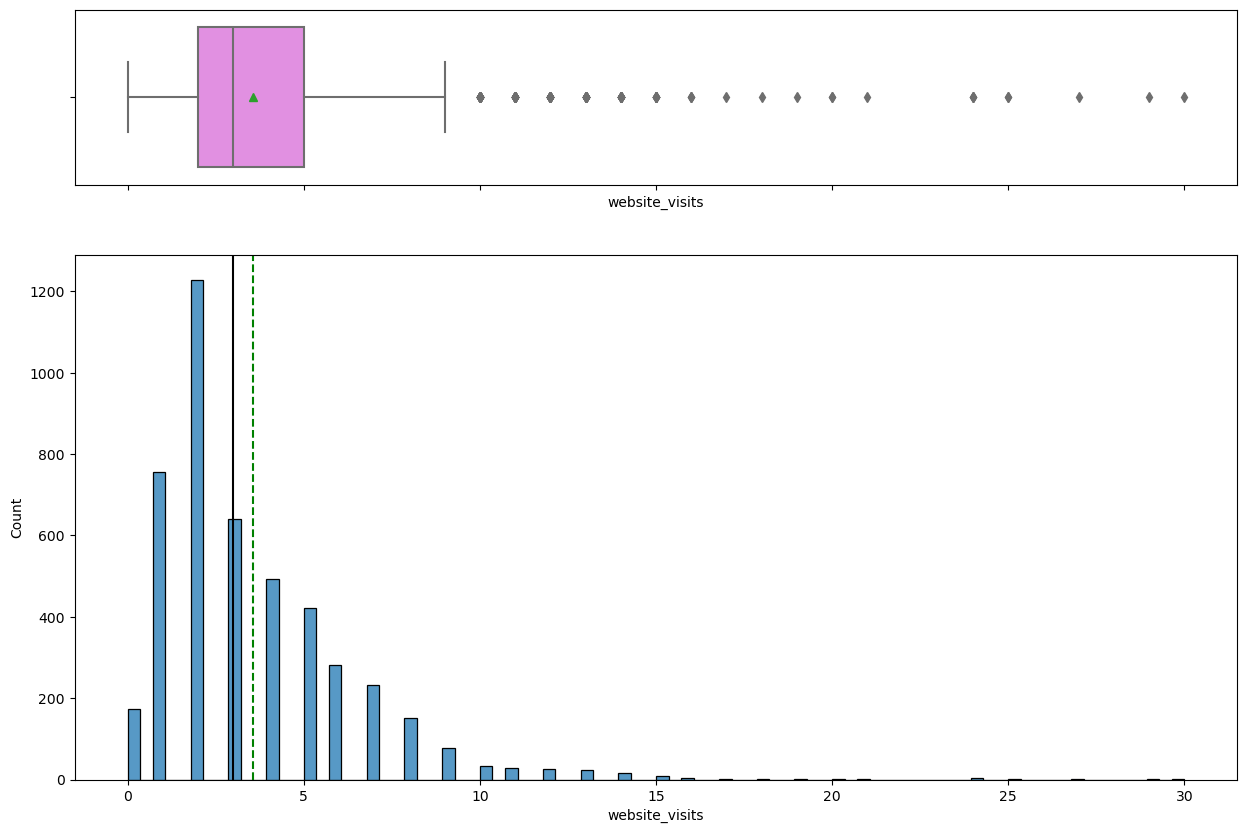

In [21]:
histogram_boxplot(data, "website_visits")

In [23]:
data[data["website_visits"] == 0].shape

(174, 14)

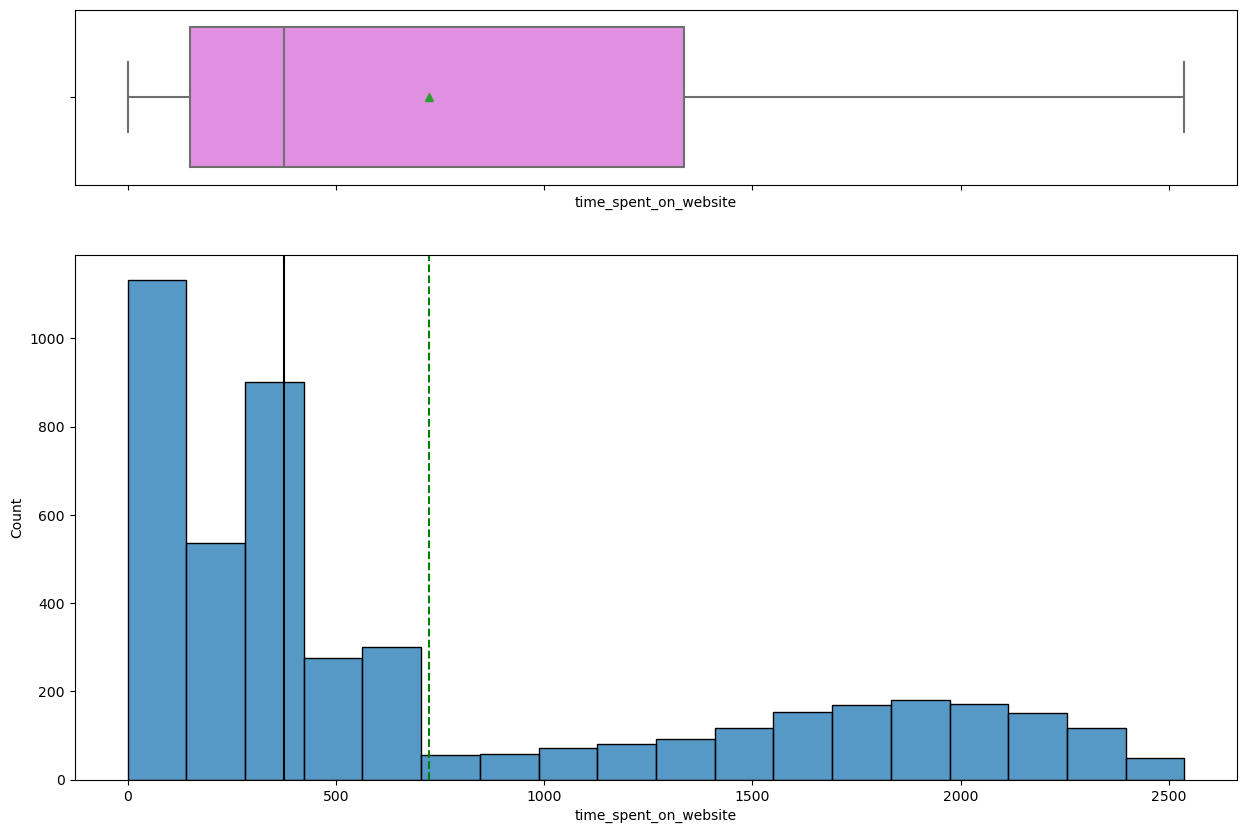

In [24]:
histogram_boxplot(data, "time_spent_on_website")

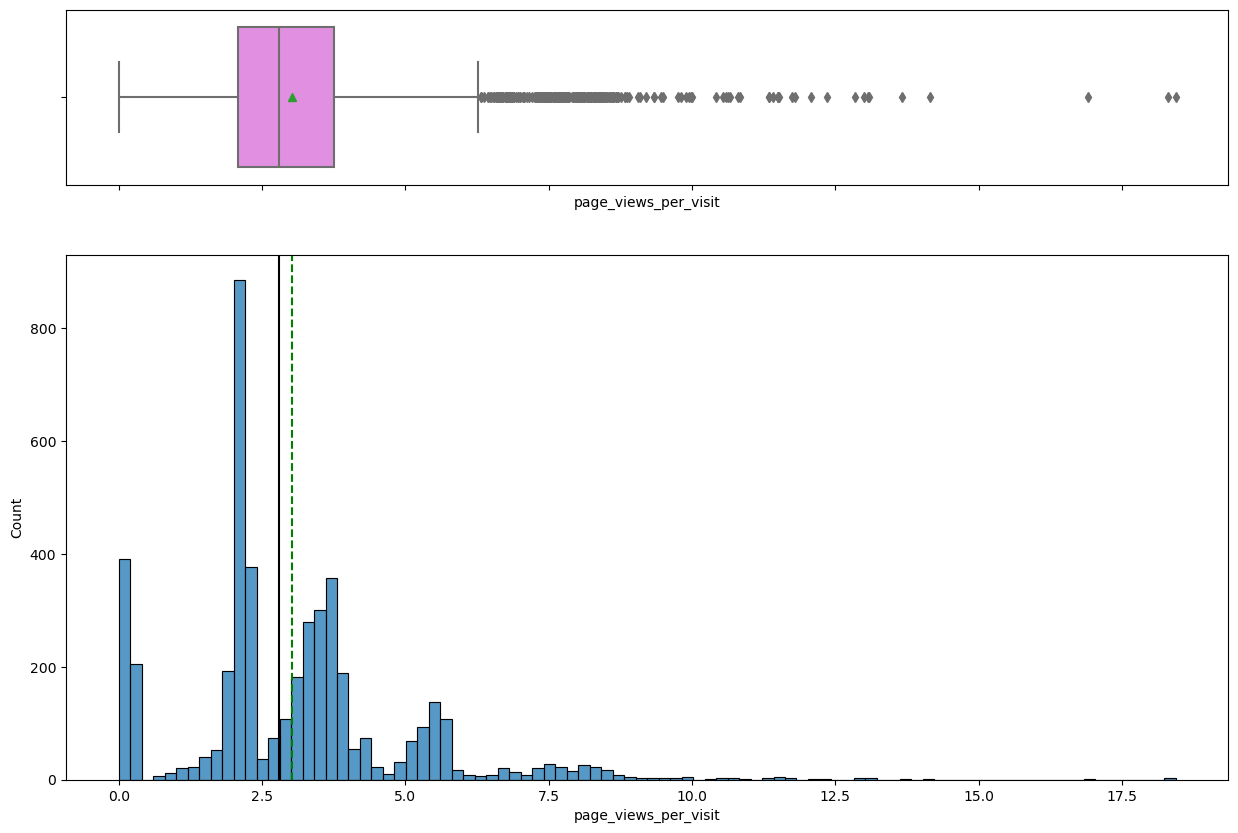

In [25]:
histogram_boxplot(data, "page_views_per_visit")

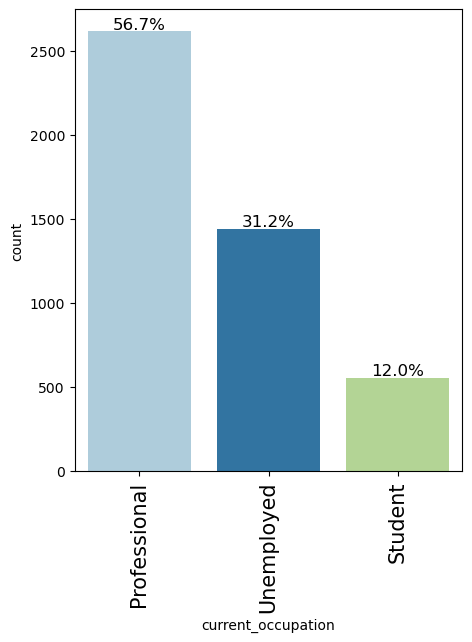

In [26]:
labeled_barplot(data, "current_occupation", perc=True)

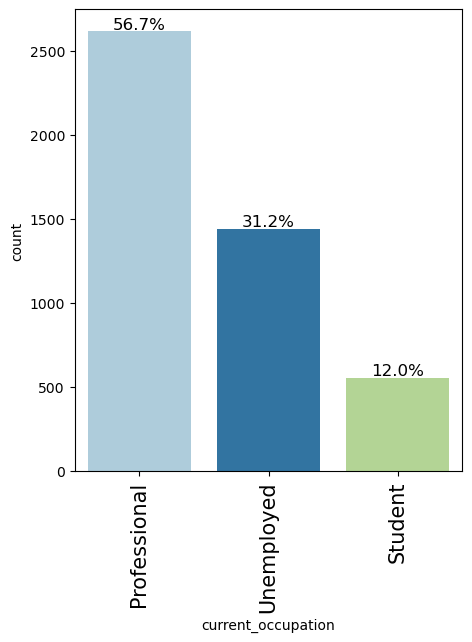

In [33]:
labeled_barplot(data, "current_occupation", perc=True) ## Complete the code to get labeled_barplot for number of children

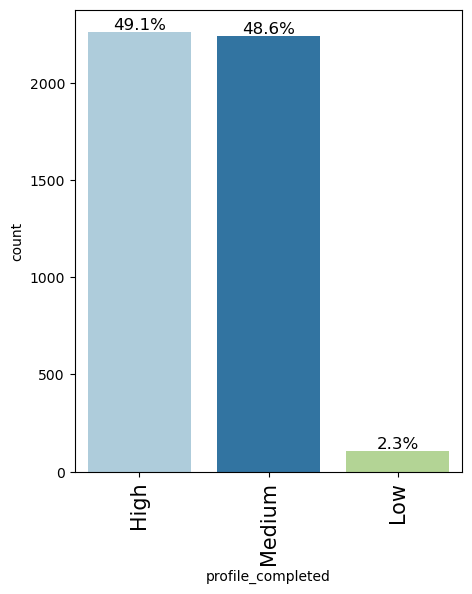

In [34]:
labeled_barplot(data, "profile_completed", perc=True)

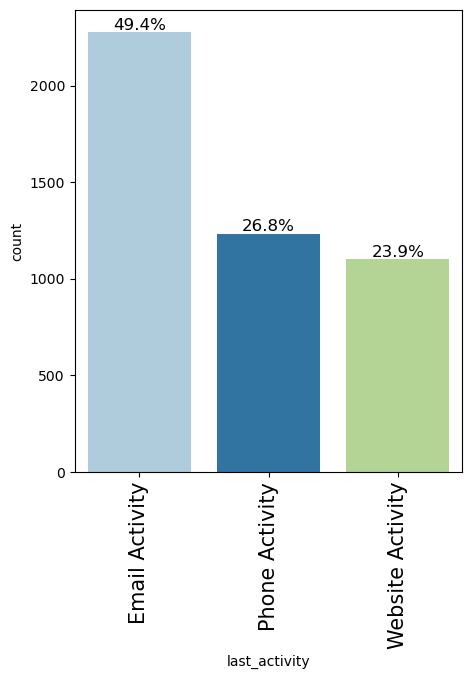

In [35]:
labeled_barplot(data, "last_activity", perc=True)

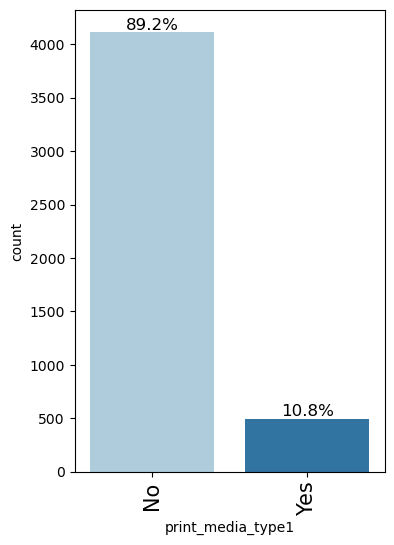

In [36]:
labeled_barplot(data, "print_media_type1", perc=True)

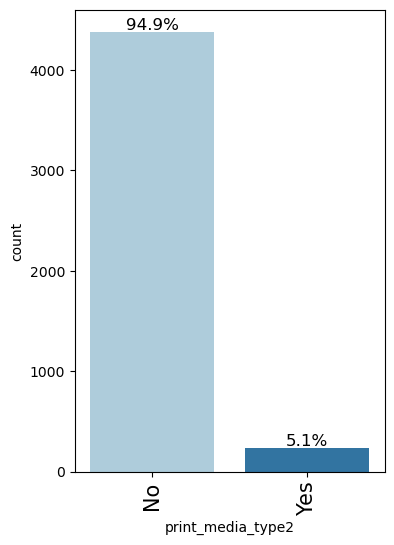

In [37]:
labeled_barplot(data, "print_media_type2", perc=True)

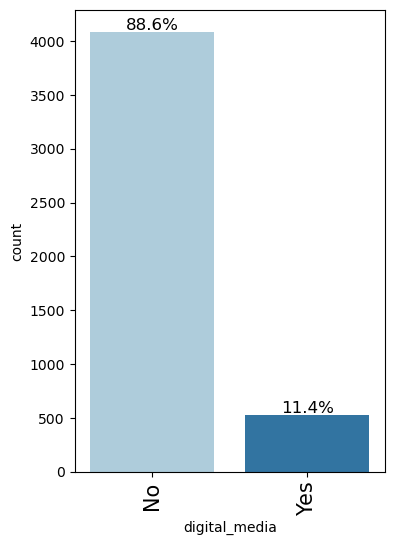

In [38]:
labeled_barplot(data, "digital_media", perc=True)

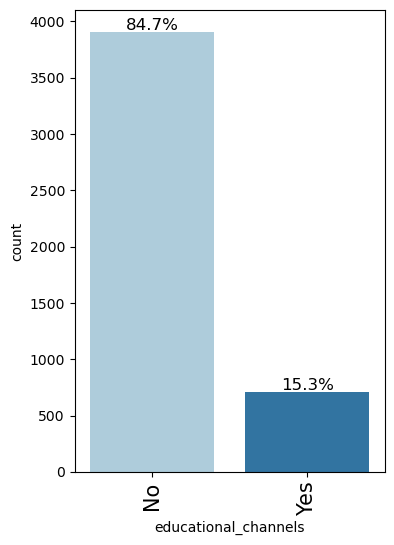

In [39]:
labeled_barplot(data, "educational_channels", perc=True)

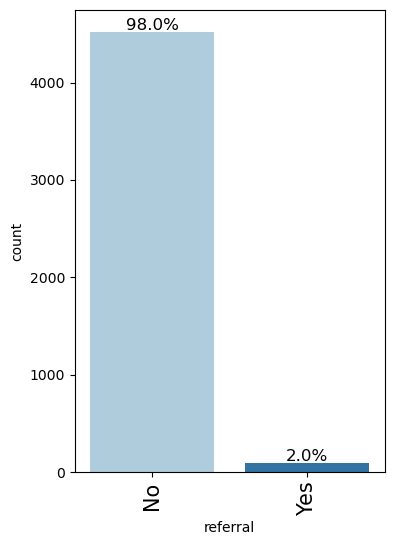

In [40]:
labeled_barplot(data, "referral", perc=True)

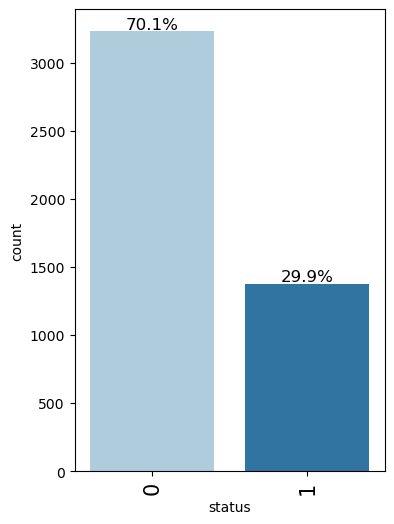

In [41]:
labeled_barplot(data, "status", perc=True)

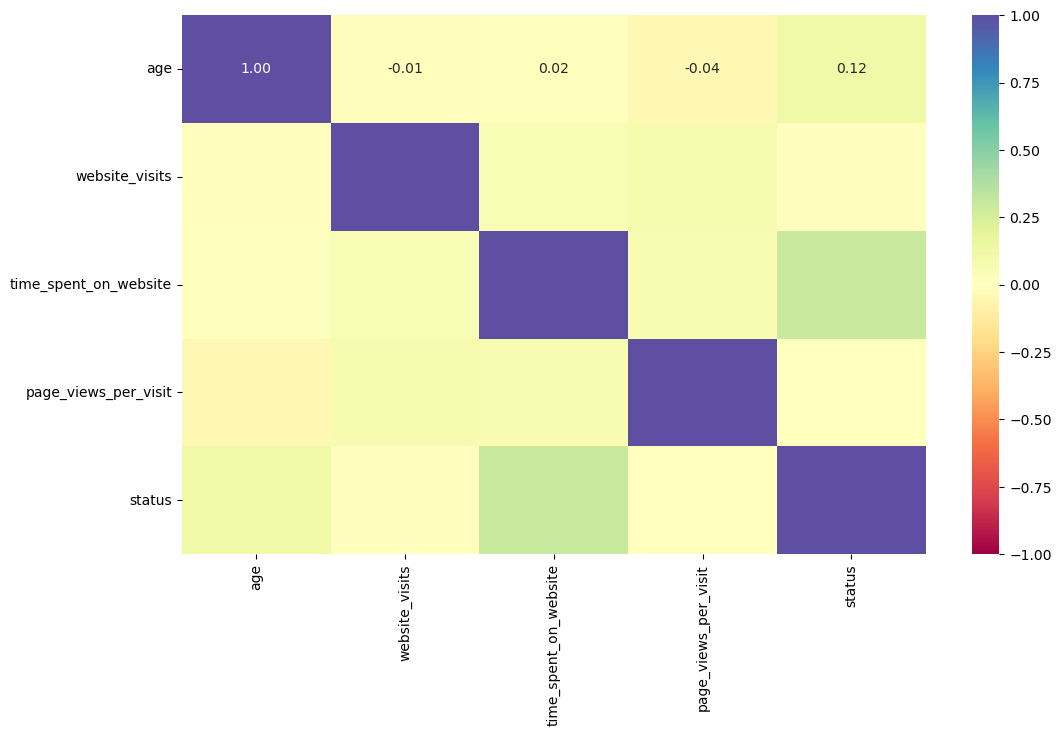

In [43]:
#BIVARIATE ANALYSIS

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


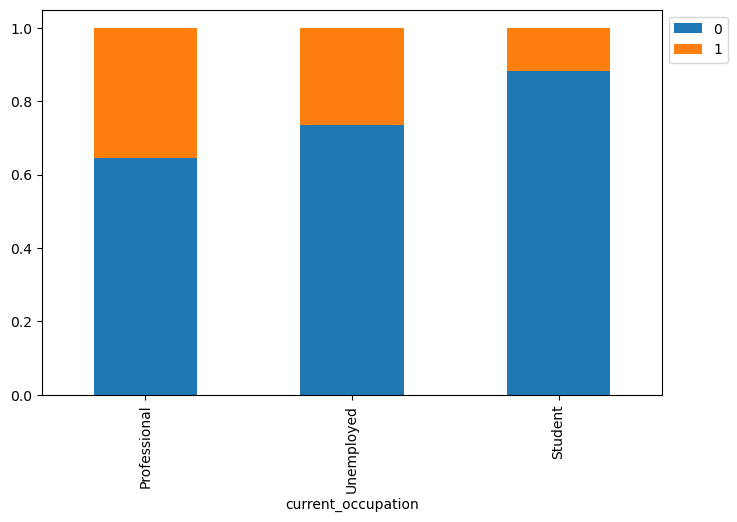

In [44]:
stacked_barplot(data, "current_occupation", "status")

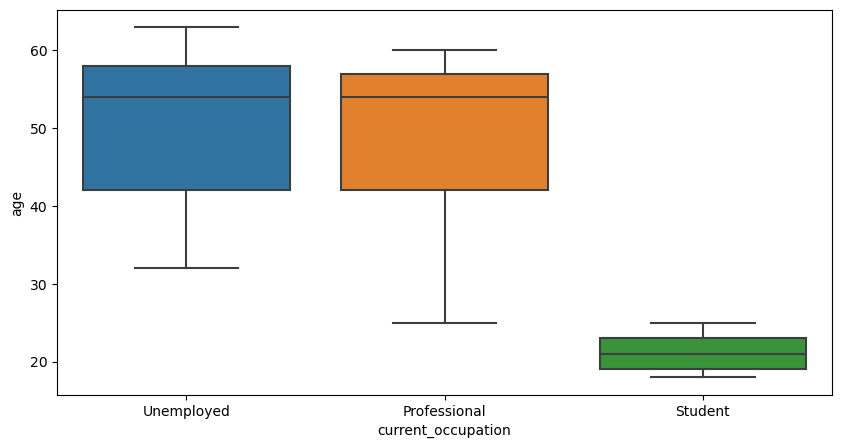

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="current_occupation", y="age", data=data) ## Complete the code to get a boxplot between current_occupation and age
plt.show()

In [46]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


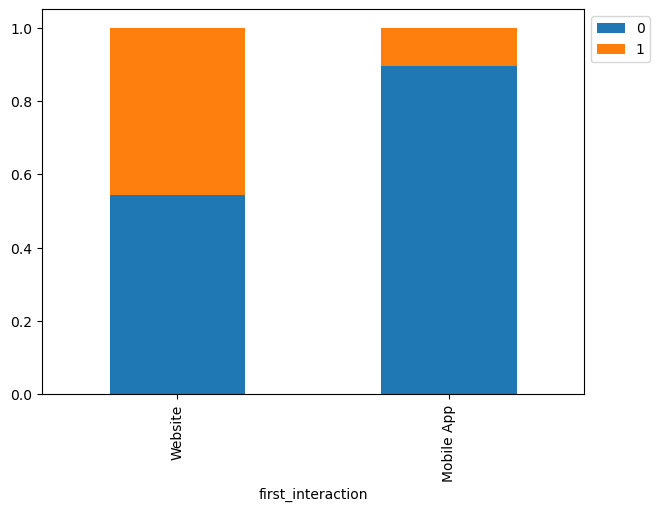

In [47]:
stacked_barplot(data, "first_interaction", "status") ## Complete the code to get stacked_barplot for first_interaction and status

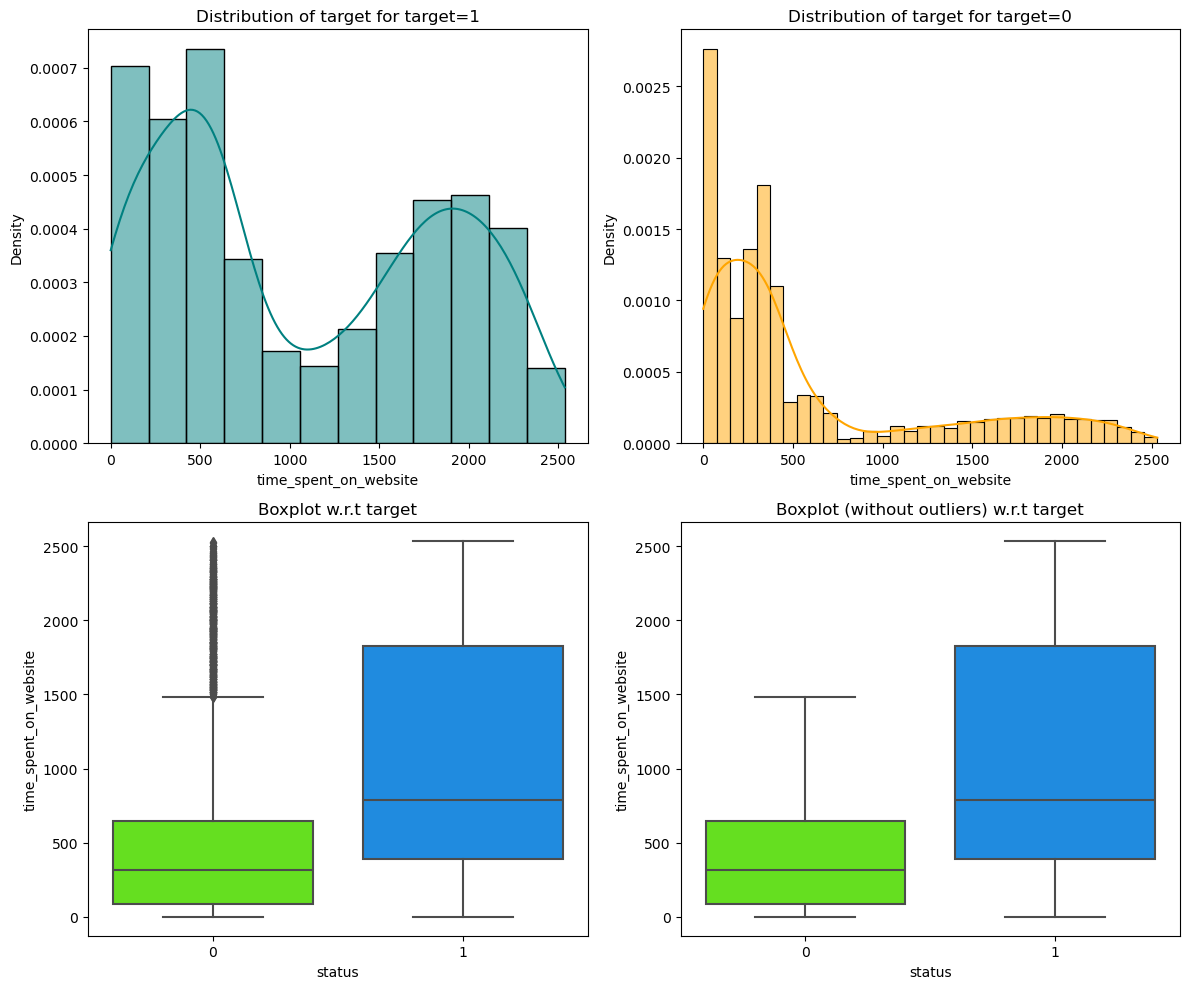

In [48]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [49]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

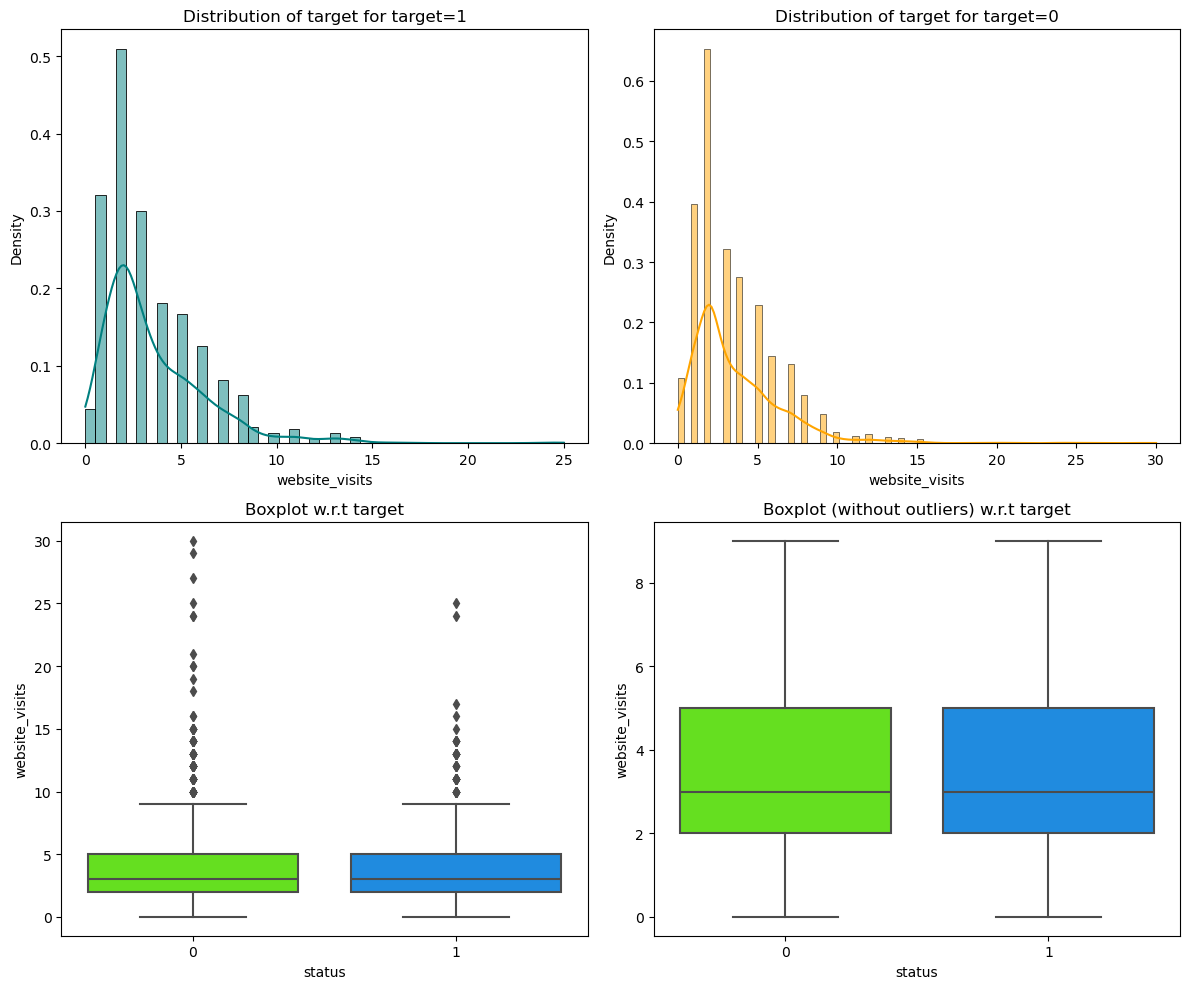

In [50]:
distribution_plot_wrt_target(data, "website_visits", "status") ## Complete the code to get distribution_plot_wrt_target for website_visits and status

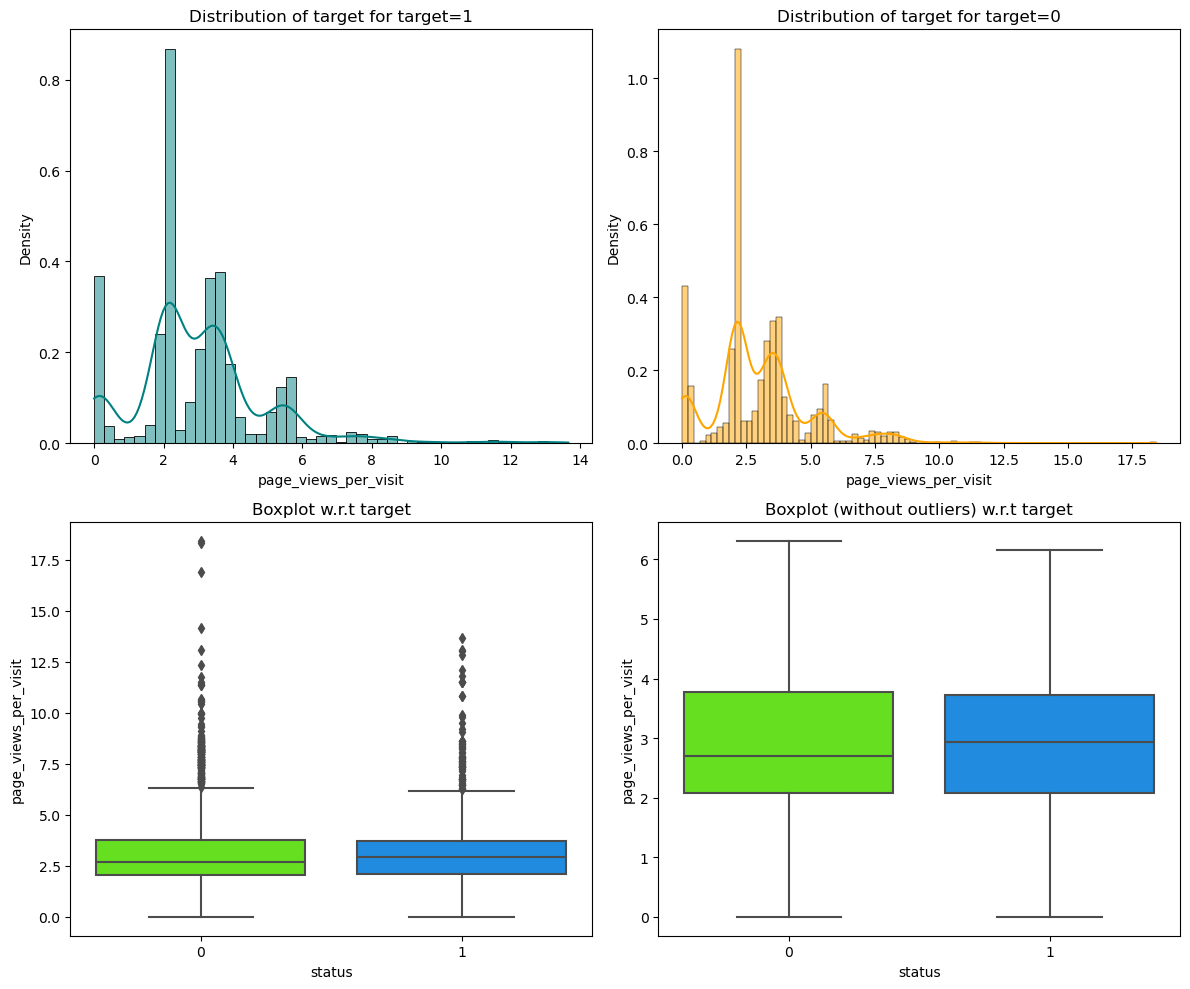

In [51]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status") ## Complete the code to get distribution_plot_wrt_target for page_views_per_visit and status

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


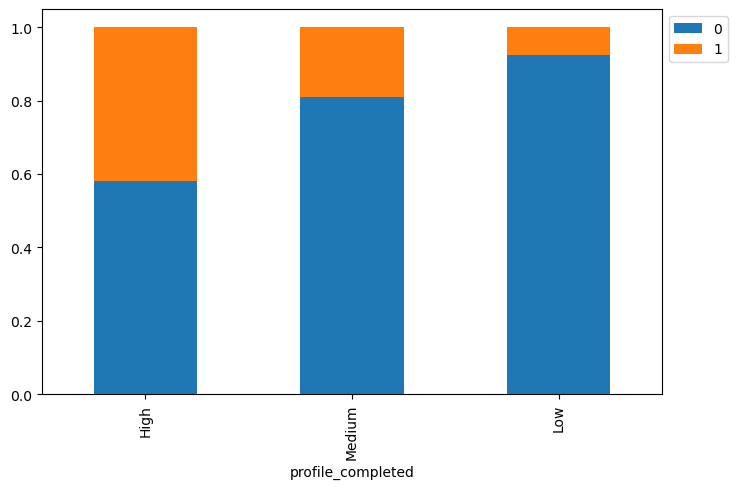

In [52]:
stacked_barplot(data, "profile_completed", "status") ## Complete the code to get stacked_barplot for profile_completed and status

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


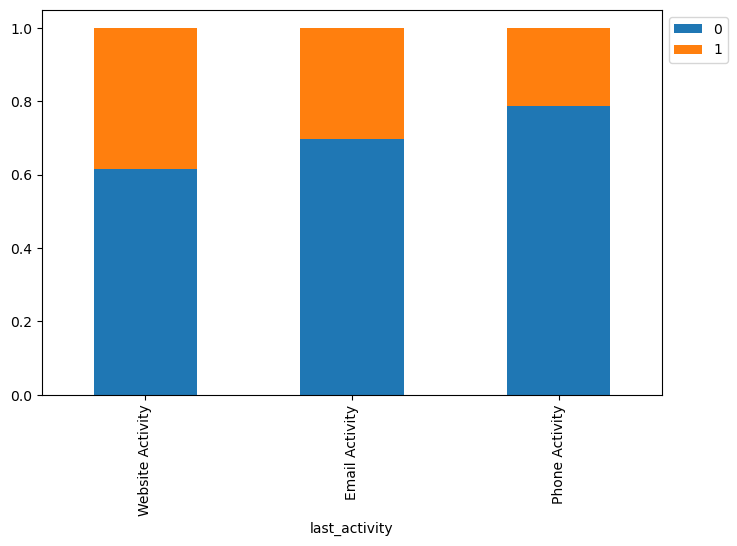

In [53]:
stacked_barplot(data, "last_activity", "status") ## Complete the code to get stacked_barplot for last_activity and status

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


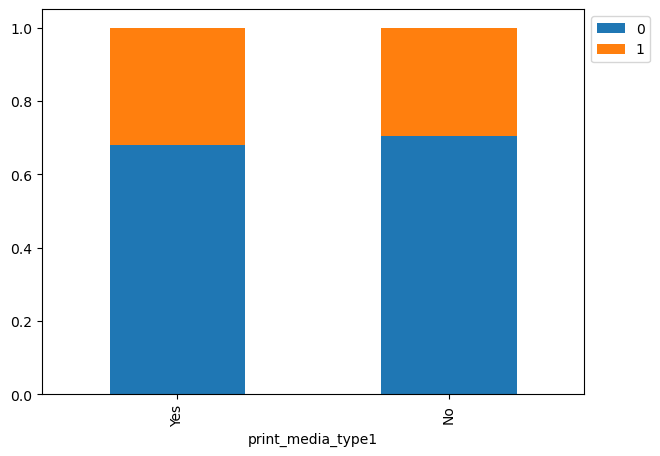

In [54]:
stacked_barplot(data, "print_media_type1", "status") ## Complete the code to get stacked_barplot between print_media_type1 and status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


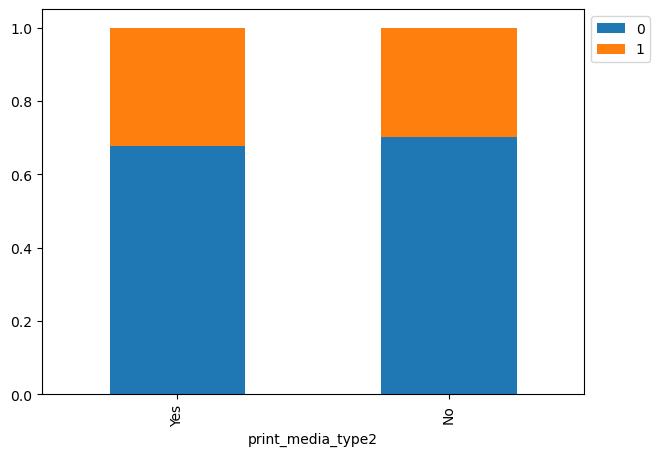

In [55]:
stacked_barplot(data, "print_media_type2", "status") ## Complete the code to get stacked_barplot between print_media_type1 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


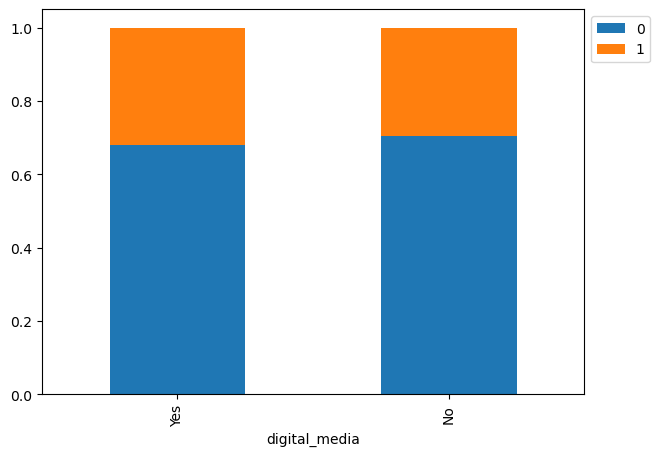

In [56]:
stacked_barplot(data, "digital_media", "status") ## Complete the code to get stacked_barplot between digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


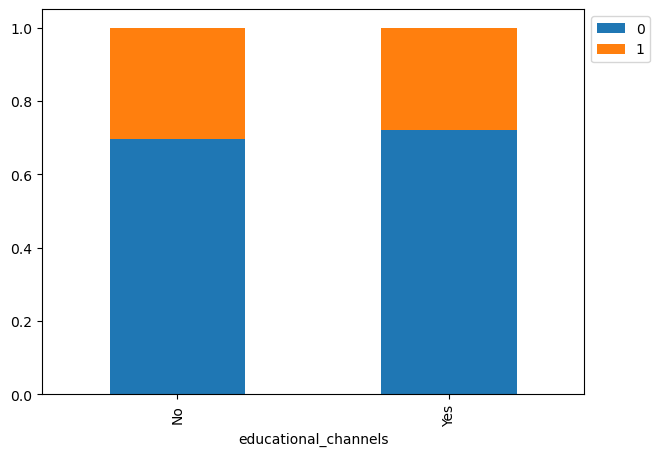

In [57]:
stacked_barplot(data, "educational_channels", "status") ## Complete the code to get stacked_barplot between educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


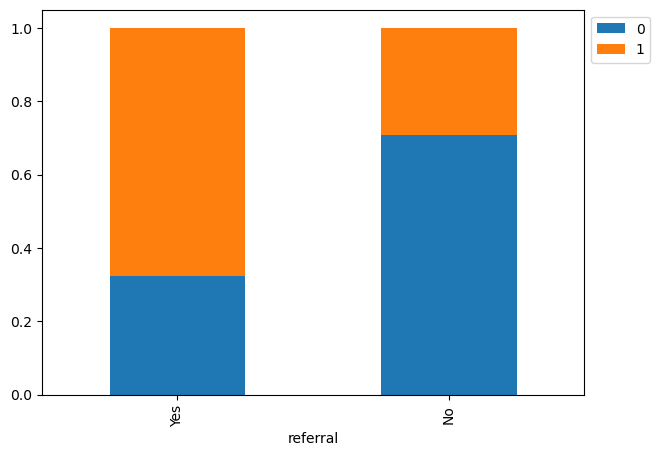

In [58]:
stacked_barplot(data, "referral", "status") ## Complete the code to get stacked_barplot between referral and status

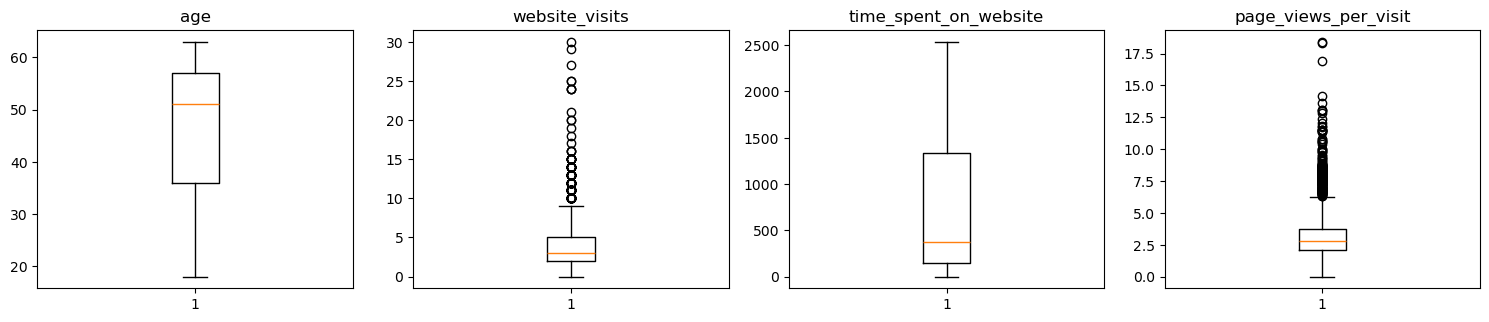

In [59]:
#DATA PREPROCESSING

# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [60]:
#DATA PREPARATION FOR MODELLING

X = data.drop(["status"], axis=1)
Y = data["status"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42           ## Complete the code to split the data into train and test in the ratio 75:25
)

In [61]:
## Reset the index of y_train so that both x and y have same indexes for training dataset

y_train.reset_index(inplace = True, drop = True)

In [62]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Shape of Training set :  (3228,)
Shape of test set :  (1384,)
Percentage of classes in training set:
status
0   0.69950
1   0.30050
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.70592
1   0.29408
Name: proportion, dtype: float64


In [63]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [64]:
#MODEL BUILDING

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [65]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [66]:
# Adding constant to data for Logistic Regression

X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [67]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.389658
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3228
Model:                          Logit   Df Residuals:                     3211
Method:                           MLE   Df Model:                           16
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.3626
Time:                        16:19:47   Log-Likelihood:                -1257.8
converged:                       True   LL-Null:                       -1973.2
Covariance Type:            nonrobust   LLR p-value:                3.858e-295
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4572      0.062    -23.561     

In [68]:
y_pred = LogisticReg.predict(X_train_with_intercept)

In [69]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.82528,0.65979,0.73227,0.69414


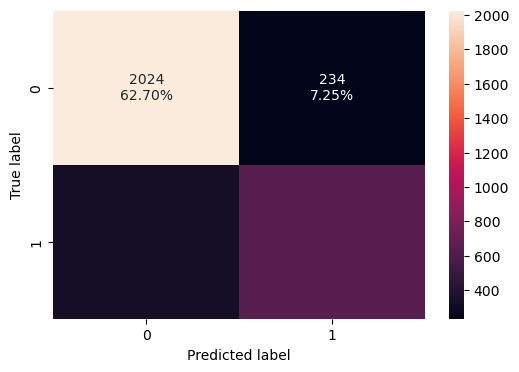

In [70]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [71]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.80347,0.61916,0.68293,0.64948


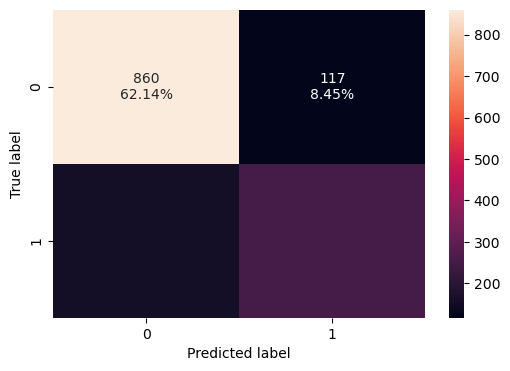

In [72]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

In [73]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [74]:
nb_perf_train = model_performance_classification(nb_model, X_train_scaled, y_train)  ## Complete the code to get model performance on training data
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.79461,0.76392,0.63064,0.69091


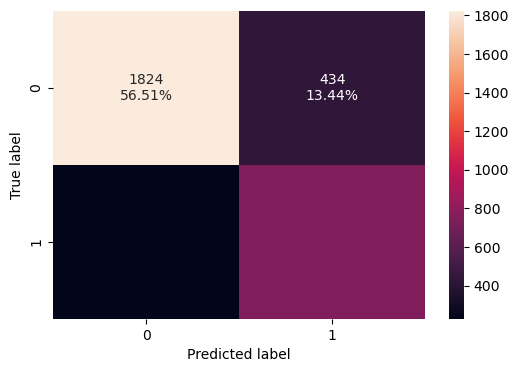

In [75]:
plot_confusion_matrix(nb_model, X_train_scaled, y_train)

In [76]:
nb_perf_test = model_performance_classification(nb_model, X_test_scaled, y_test)  ## Complete the code to get model performance on test data
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.77673,0.74693,0.59608,0.66303


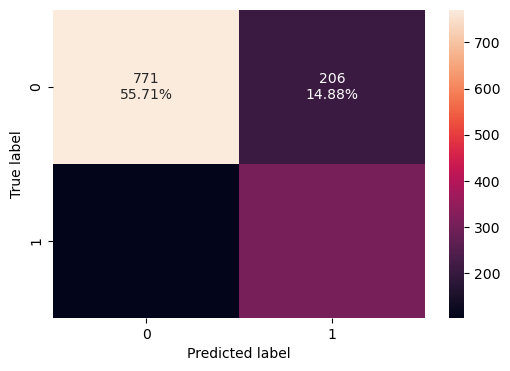

In [77]:
plot_confusion_matrix(nb_model, X_test_scaled, y_test)  ## Complete the code to create confusion matrix for test data

In [78]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 3)  ## Complete the code to build KNN model with nummber of neighbors as 3
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
knn_perf_train = model_performance_classification(knn_model, X_train_scaled, y_train)  ## Complete the code to get model performance on training data
knn_perf_train

,Accuracy,Recall,Precision,F1
0,0.89002,0.77629,0.84512,0.80924


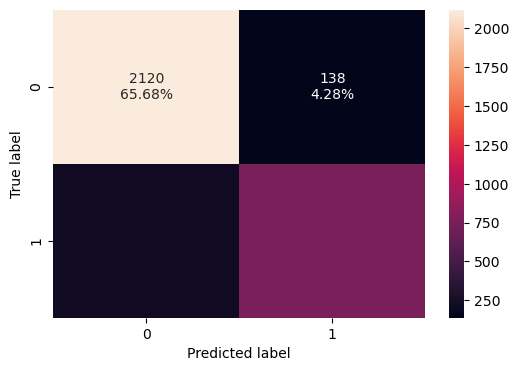

In [80]:
plot_confusion_matrix(knn_model, X_train_scaled, y_train)  ## Complete the code to create confusion matrix for training data

In [81]:
knn_perf_test = model_performance_classification(knn_model, X_test_scaled, y_test)  ## Complete the code to get model performance on test data
knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.80491,0.60934,0.69081,0.64752


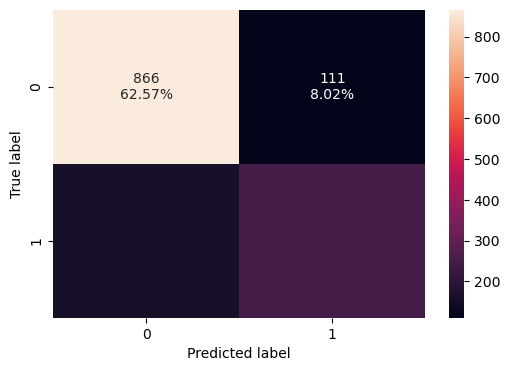

In [82]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test)  ## Complete the code to create confusion matrix for test data

In [83]:
#DECISION TREE CLASSIFIER

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
decision_tree_perf_train = model_performance_classification(dt_model, X_train, y_train)  ## Complete the code to get model performance on training data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


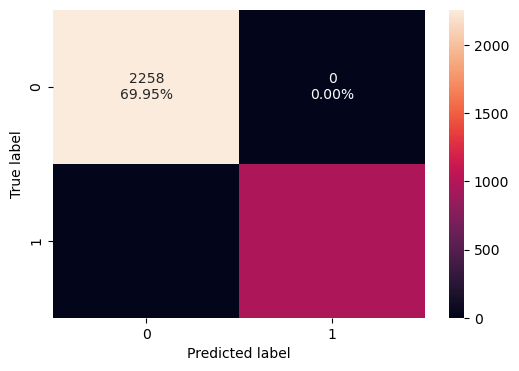

In [85]:
plot_confusion_matrix(dt_model, X_train, y_train)  ## Complete the code to create confusion matrix for training data

In [86]:
decision_tree_perf_test = model_performance_classification(dt_model, X_test, y_test)  ## Complete the code to get model performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.80564,0.65848,0.67337,0.66584


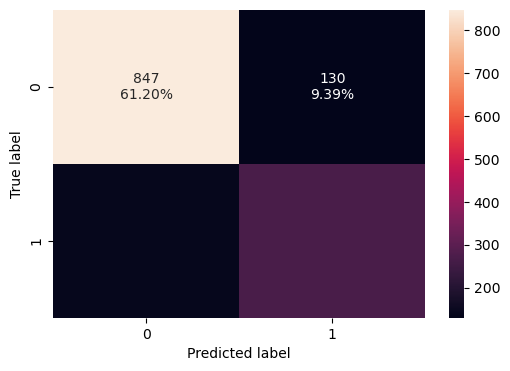

In [87]:
plot_confusion_matrix(dt_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [88]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [89]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)  ## Complete the code to calculate VIF for the X_train data with intercept

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                          Variable     VIF
0                              age 1.98745
1                   website_visits 1.01510
2            time_spent_on_website 1.03067
3             page_views_per_visit 1.02168
4       current_occupation_Student 2.03783
5    current_occupation_Unemployed 1.07143
6        first_interaction_Website 1.00520
7            profile_completed_Low 1.03679
8         profile_completed_Medium 1.02939
9     last_activity_Phone Activity 1.13444
10  last_activity_Website Activity 1.13530
11           print_media_type1_Yes 1.00469
12           print_media_type2_Yes 1.00594
13               digital_media_Yes 1.00434
14        educational_channels_Yes 1.00634
15                    referral_Yes 1.01109


In [90]:
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

In [91]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.389658
         Iterations 7
Dropping column website_visits with p-value: 0.714433784418103
Optimization terminated successfully.
         Current function value: 0.389679
         Iterations 7
Dropping column educational_channels_Yes with p-value: 0.5934430679258951
Optimization terminated successfully.
         Current function value: 0.389723
         Iterations 7
Dropping column digital_media_Yes with p-value: 0.4787871252242719
Optimization terminated successfully.
         Current function value: 0.389800
         Iterations 7
Dropping column print_media_type2_Yes with p-value: 0.4751395882887154
Optimization terminated successfully.
         Current function value: 0.389879
         Iterations 7
Dropping column print_media_type1_Yes with p-value: 0.26331511624706916
Optimization terminated successfully.
         Current function value: 0.390071
         Iterations 7
Dropping column age with p-value: 0.23155

In [92]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]  ## Complete the code to get the test data with selected features
X_train_significant.head(10)

,const,time_spent_on_website,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,referral_Yes
0,1.00000,-0.19754,-0.36528,-0.68601,0.90987,-0.16145,1.03854,-0.60264,-0.56304,-0.14447
1,1.00000,1.94527,2.73765,-0.68601,-1.09906,-0.16145,1.03854,-0.60264,-0.56304,-0.14447
2,1.00000,-0.87782,-0.36528,-0.68601,0.90987,-0.16145,1.03854,-0.60264,-0.56304,-0.14447
3,1.00000,-0.27536,-0.36528,-0.68601,0.90987,-0.16145,-0.96289,1.65936,-0.56304,-0.14447
4,1.00000,-0.57458,-0.36528,1.45770,-1.09906,-0.16145,-0.96289,-0.60264,-0.56304,-0.14447
5,1.00000,-0.85367,2.73765,-0.68601,0.90987,-0.16145,-0.96289,-0.60264,-0.56304,-0.14447
6,1.00000,-0.44845,-0.36528,1.45770,-1.09906,-0.16145,1.03854,1.65936,-0.56304,-0.14447
7,1.00000,-0.62691,-0.36528,-0.68601,-1.09906,-0.16145,-0.96289,-0.60264,1.77607,-0.14447
8,1.00000,-0.90331,-0.36528,-0.68601,-1.09906,-0.16145,-0.96289,-0.60264,1.77607,-0.14447
9,1.00000,-0.07141,-0.36528,1.45770,-1.09906,-0.16145,1.03854,-0.60264,1.77607,-0.14447


In [93]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()  ## Complete the code to train the Logistic Regression model with significant features
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.390526
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3228
Model:                          Logit   Df Residuals:                     3218
Method:                           MLE   Df Model:                            9
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.3611
Time:                        17:31:02   Log-Likelihood:                -1260.6
converged:                       True   LL-Null:                       -1973.2
Covariance Type:            nonrobust   LLR p-value:                2.757e-301
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4511      0.062    -23.581     

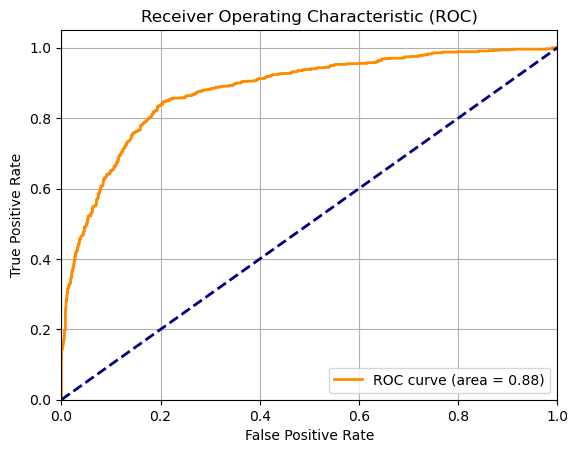

In [94]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)  ## Complete the code to get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [95]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.288


In [96]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.80979,0.84330,0.63906,0.72711


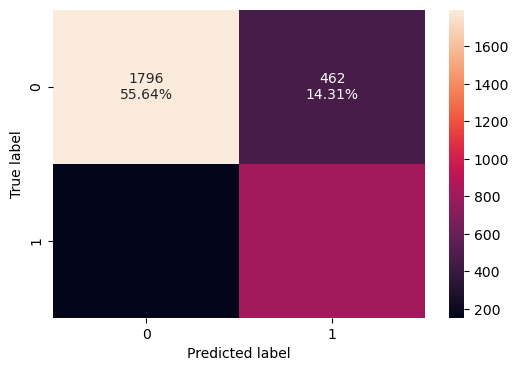

In [97]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

In [98]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.78468,0.82310,0.59715,0.69215


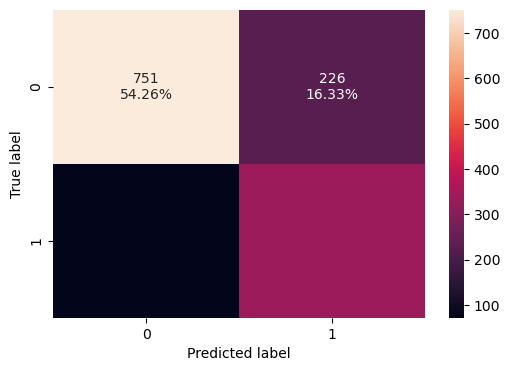

In [99]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

In [100]:
# Define the range for k values
k_values = range(2,21)  ## Complete the code to define the range for k-values between 2 and 20 (both inclusive)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors = k)  ## Complete the code to build KNN model with nummber of neighbors as k in each iteration
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.4398034398034398
Recall for k=3: 0.6093366093366094
Recall for k=4: 0.5036855036855037
Recall for k=5: 0.6265356265356266
Recall for k=6: 0.5552825552825553
Recall for k=7: 0.6511056511056511
Recall for k=8: 0.5872235872235873
Recall for k=9: 0.6511056511056511
Recall for k=10: 0.5798525798525799
Recall for k=11: 0.6363636363636364
Recall for k=12: 0.5626535626535627
Recall for k=13: 0.6142506142506142
Recall for k=14: 0.5626535626535627
Recall for k=15: 0.6216216216216216
Recall for k=16: 0.5823095823095823
Recall for k=17: 0.628992628992629
Recall for k=18: 0.5921375921375921
Recall for k=19: 0.6142506142506142
Recall for k=20: 0.5872235872235873

The best value of k is: 7 with a recall of: 0.6511056511056511


In [102]:
knn_tuned = KNeighborsClassifier(n_neighbors = best_k)  ## Complete the code to build KNN model with nummber of neighbors as best_k
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [103]:
knn_tuned_perf_train = model_performance_classification(knn_tuned, X_train_scaled, y_train)  ## Complete the code to get model performance on training data
knn_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.85874,0.69588,0.80742,0.74751


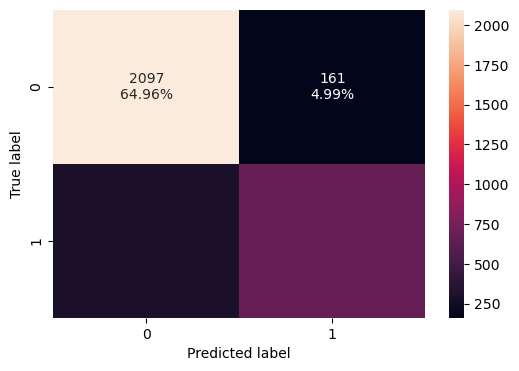

In [104]:
plot_confusion_matrix(knn_tuned, X_train_scaled, y_train)  ## Complete the code to create confusion matrix for training data

In [105]:
knn_tuned_perf_test = model_performance_classification(knn_tuned, X_test_scaled, y_test)  ## Complete the code to get model performance on test data
knn_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.83598,0.65111,0.75714,0.70013


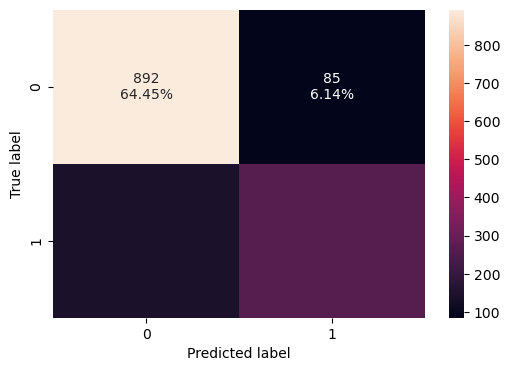

In [106]:
plot_confusion_matrix(knn_tuned, X_test_scaled, y_test)  ## Complete the code to create confusion matrix for test data

In [107]:
# Choose the type of classifier.
dt_model_tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=40,
                       random_state=42)

In [108]:
decision_tree_tuned_perf_train = model_performance_classification(dt_model_tuned, X_train, y_train)  ## Complete the code to get model performance on training data
decision_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.84294,0.88247,0.68535,0.77152


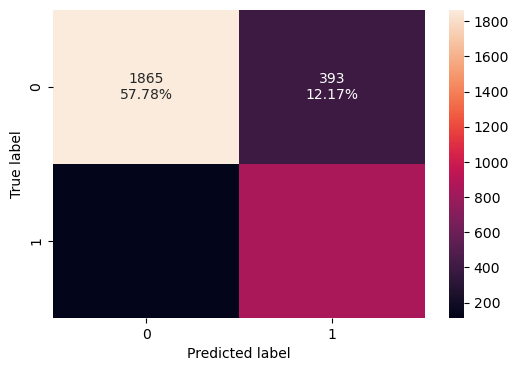

In [109]:
plot_confusion_matrix(dt_model_tuned, X_train, y_train)  ## Complete the code to create confusion matrix for training data

In [110]:
decision_tree_tuned_perf_test = model_performance_classification(dt_model_tuned, X_test, y_test)  ## Complete the code to get model performance on test data
decision_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.83960,0.87469,0.67552,0.76231


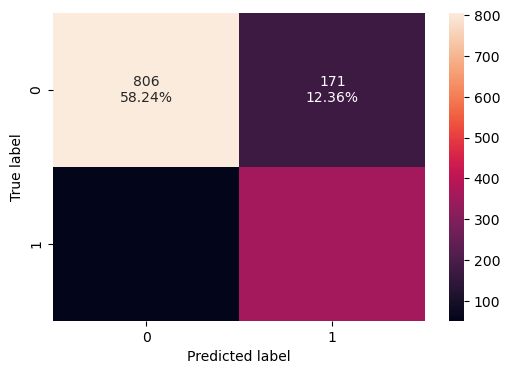

In [111]:
plot_confusion_matrix(dt_model_tuned, X_test, y_test)  ## Complete the code to create confusion matrix for test data

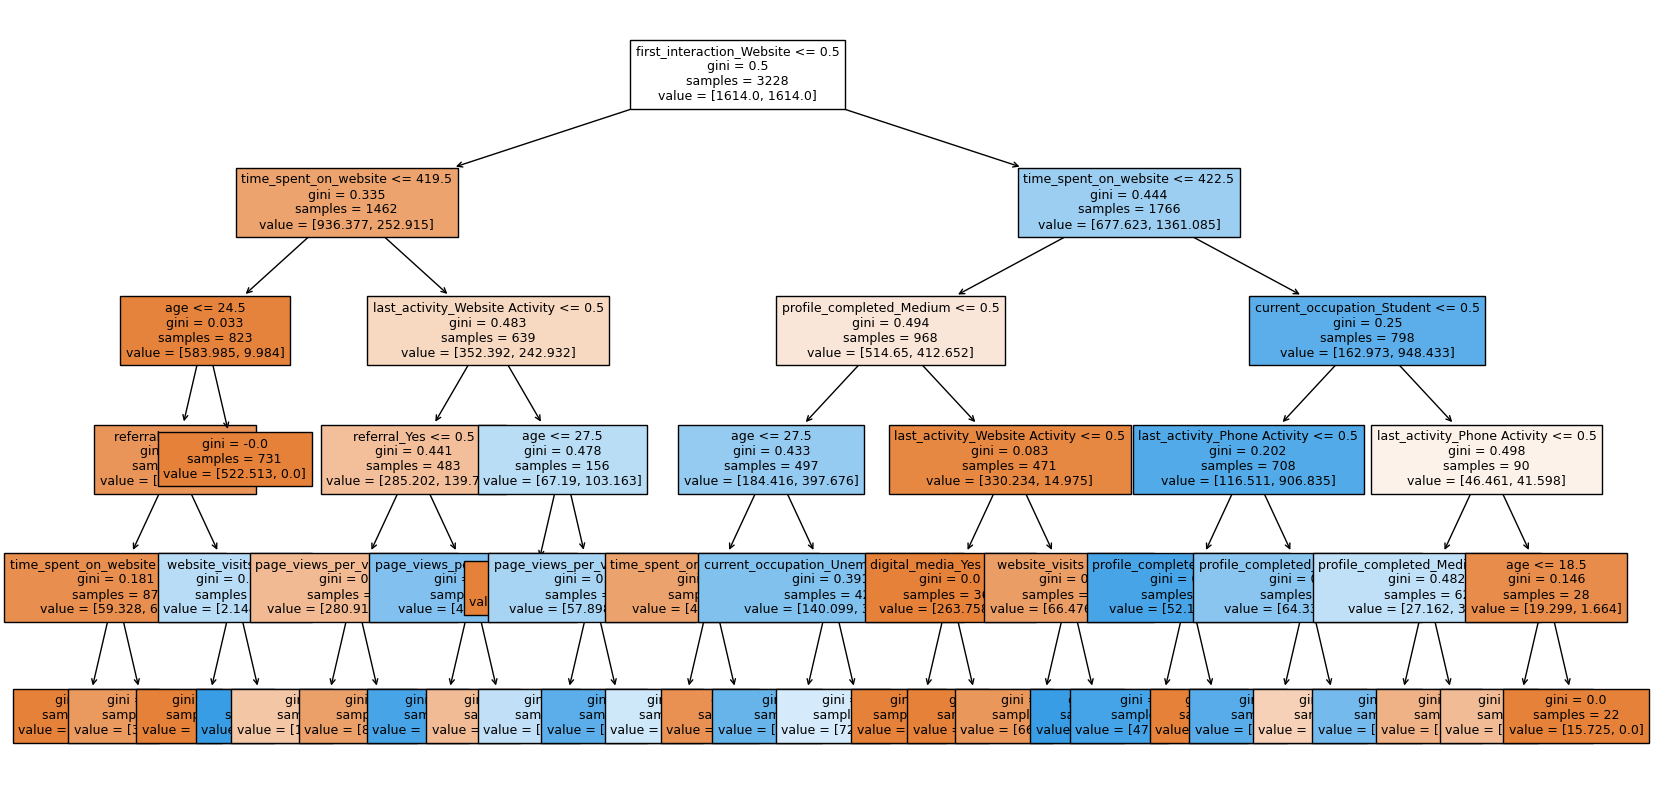

In [112]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

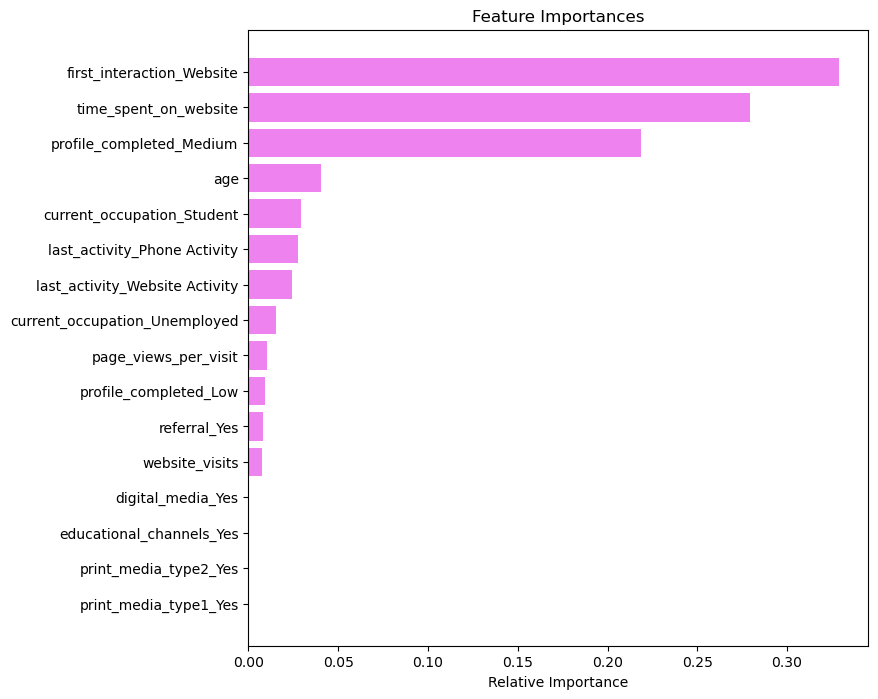

In [113]:
# Uncomment and run to check feature importance for Tuned Decision Tree model


# # importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [114]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.82528,0.80979,0.79461,0.89002,0.85874,1.00000,0.84294
Recall,0.65979,0.84330,0.76392,0.77629,0.69588,1.00000,0.88247
Precision,0.73227,0.63906,0.63064,0.84512,0.80742,1.00000,0.68535
F1,0.69414,0.72711,0.69091,0.80924,0.74751,1.00000,0.77152


In [115]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.82528,0.80979,0.77673,0.80491,0.83598,0.80564,0.83960
Recall,0.65979,0.84330,0.74693,0.60934,0.65111,0.65848,0.87469
Precision,0.73227,0.63906,0.59608,0.69081,0.75714,0.67337,0.67552
F1,0.69414,0.72711,0.66303,0.64752,0.70013,0.66584,0.76231
